In [256]:
import json
import pandas as pd
import numpy as np
import networkx as nx
from pprint import pprint
import matplotlib.pyplot as plt
from itertools import combinations

In [257]:
target = "it" #dhdk - cs - it

In [258]:
authors_json = '../data/{0}/{0}_authors.json'.format(target)
publications_json = '../data/{0}/{0}_publications.json'.format(target)

with open(authors_json, 'r') as f:
    authors = json.load(f)

with open(publications_json, 'r') as f:
    publications = json.load(f)

G = nx.Graph()

### Add the authors as nodes and coauthorship as edges

The top 19 authors with the most publications get chosen as the starting node

In [259]:
top_19_authors = sorted([(key, len(value.get("Publications", {}))) for key, value in publications.items()], key=lambda x: x[1], reverse=True)[:19]
names = [(author, publications[author]['Nome']) for author, _ in top_19_authors]

In [260]:
for prof, _ in top_19_authors:
    for publication in publications[prof]['Publications']:
        for author in publications[prof]['Publications'][publication]['internalAuthor']:
            if authors[author]['Nome completo'] not in G.nodes:
                G.add_node(authors[author]['Nome completo'], affiliation=authors[author]['Afferenza'])
        for author, coauthor in combinations(publications[prof]['Publications'][publication]['internalAuthor'], 2):
            if G.has_edge(authors[author]['Nome completo'], authors[coauthor]['Nome completo']):
                G[authors[author]['Nome completo']][authors[coauthor]['Nome completo']]['weight'] += 1
                G[authors[author]['Nome completo']][authors[coauthor]['Nome completo']]['publications'].append(publication)
            else:
                G.add_edge(authors[author]['Nome completo'], authors[coauthor]['Nome completo'], weight=1, publications=[publication])

print(G)

Graph with 304 nodes and 1523 edges


### Visualize the network

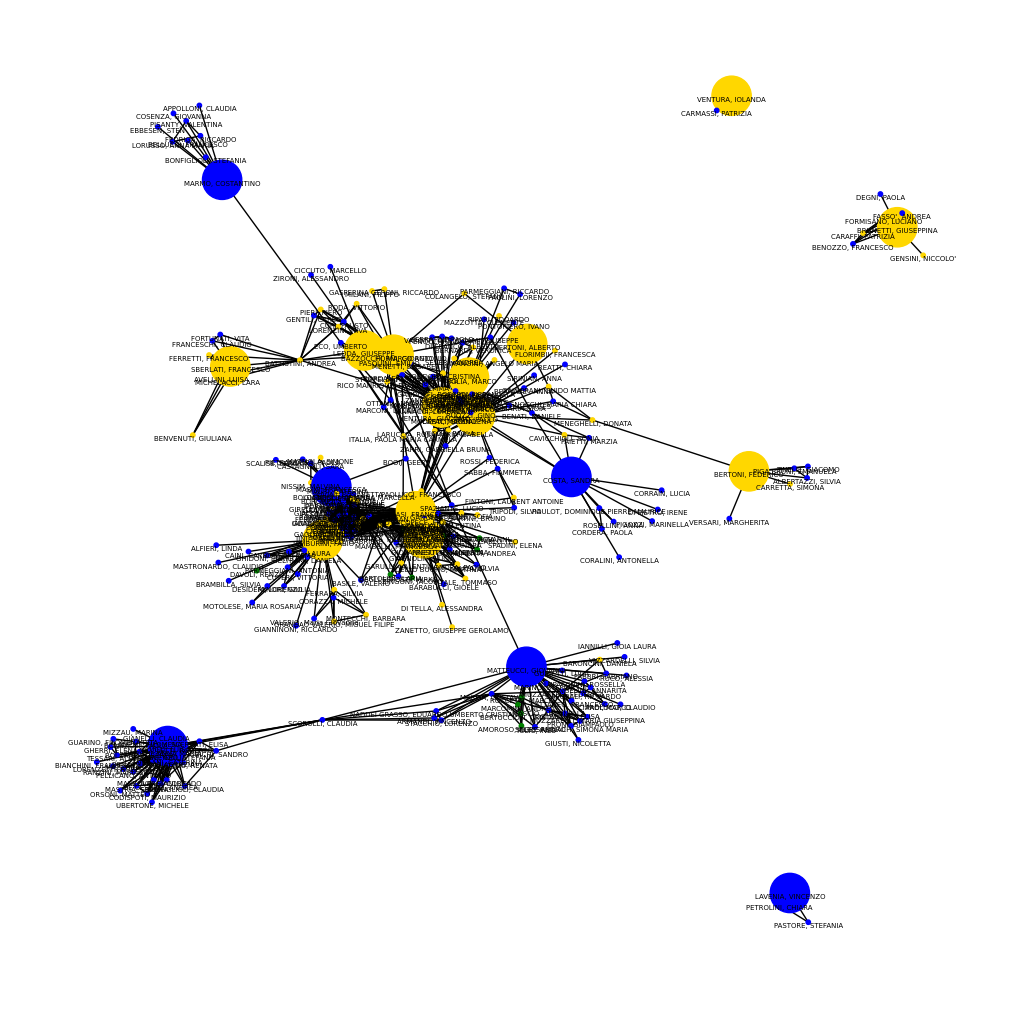

In [261]:
color_palette = {
    'DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANISTICA': 'gold',
    'DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGNERIA': 'green',
}

bbox_props = {
    'boxstyle': 'round',
    'facecolor': 'white',
    'edgecolor': 'black',
    'linewidth': 1,
    'pad': 0.5,
    'alpha': 1,
}

pos = nx.spring_layout(G, iterations=30)
plt.figure(figsize=(10,10))
nx.draw(G, 
        pos,
        node_color=[color_palette[node[1]['affiliation']] if color_palette.get(node[1]['affiliation']) else 'blue' for node in G.nodes(data=True)], 
        node_size = [800 if node[0] in [t[1] for t in names] else 10 for node in G.nodes(data=True)]),
for node, data in G.nodes(data=True):
    if node in names:
        nx.draw_networkx_labels(G, pos, labels={node: node}, font_size=12, font_color='black', verticalalignment='top', bbox=bbox_props)
    else:
        nx.draw_networkx_labels(G, pos, labels={node: node}, font_size=5, font_color='black', verticalalignment='top')

plt.show()

### Write the network

In [262]:
nx.write_gml(G, '../data/{0}/{0}_coauthorship_network.gml'.format(target), stringizer=lambda x: str(x))